# Life expectancy

In [2]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 1.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import auc

In [4]:
df = pd.read_csv('/Users/wingkaho/Desktop/datasource_qm.csv')

In [5]:
df

,borough_name,borough_code,borough_area_hectare,green_area_hectare,blue _area_hectare,green+blue_area_hectare,percent_green,percent_blue,percent_green+blue,population,...,number_annual_age15+_females,meanpercent_homes_with_good_access,meanpercent_home_with_deficiency_access,any_neurotic_disorder_per1000,all_phobias_per1000,depressive_episode_per1000,generalised_anxiety_disorder_per1000,mixed_anxiety_depression,obsessive_compulsive_disorder_per1000,panic_ disorder_per1000
0,City of London,E09000001,314.94,17.61,24.31,41.92,5.59,7.72,13.31,"7,400",...,0,0,100,190.6,22.041537,39.516764,60.4,84.4,15.9,9.4
1,Barking and Dagenham,E09000002,3779.93,1481.78,230.50,1712.28,39.20,6.10,45.30,"185,900",...,2,72,28,177.5,21.301491,34.411868,51.1,82.6,15.2,8.2
2,Barnet,E09000003,8674.84,5030.91,60.01,5090.92,57.99,0.69,58.69,"356,400",...,13,82,18,167.4,19.969920,32.483563,49.0,77.4,14.1,7.9
3,Bexley,E09000004,6428.65,2759.07,437.52,3196.59,42.92,6.81,49.72,"232,000",...,4,83,17,155.6,18.456990,30.428115,45.9,71.7,13.0,7.3
4,Brent,E09000005,4323.27,1726.56,44.59,1771.15,39.94,1.03,40.97,"311,200",...,3,82,18,182.3,21.760559,35.195831,53.0,84.4,15.5,8.5
5,Bromley,E09000006,15013.49,10262.64,56.96,10319.60,68.36,0.38,68.74,"309,400",...,8,82,18,157.7,18.742408,30.980945,47.2,72.4,13.1,7.4
6,Camden,E09000007,2178.93,943.02,19.81,962.83,43.28,0.91,44.19,"220,300",...,8,71,29,206.3,24.698391,39.258031,58.5,97.0,17.8,9.5
7,Croydon,E09000008,8649.44,4802.84,11.56,4814.40,55.53,0.13,55.66,"363,400",...,6,70,30,172.4,20.718164,33.733624,50.9,79.5,14.6,8.0
8,Ealing,E09000009,5554.43,2441.65,52.21,2493.87,43.96,0.94,44.90,"338,400",...,1,75,25,174.4,20.809948,34.029337,51.7,80.0,14.7,8.2
9,Enfield,E09000010,8220.02,4352.73,424.01,4776.74,52.95,5.16,58.11,"312,500",...,2,54,46,170.7,20.369817,33.357213,50.4,78.7,14.4,7.9


In [7]:
df.columns

Index(['borough_name', 'borough_code', 'borough_area_hectare',
       'green_area_hectare', 'blue _area_hectare', 'green+blue_area_hectare',
       'percent_green', 'percent_blue', 'percent_green+blue', 'population',
       'death_persons', 'death_males', 'death_females',
       'standard_mortality_ratio_persons', 'standard_mortality_ratio_males',
       'standard_mortality_ratio_females', 'life_expectancy_birth_males',
       'life_expectancy_birth_females', 'life_expectancy_65_males',
       'life_expectancy_65_females', 'DSR_annual_age15+_persons',
       'DSR_annual_age15+_males', 'DSR_annual_age15+_females',
       'number_annual_age15+_persons', 'number_annual_age15+_males',
       'number_annual_age15+_females', 'meanpercent_homes_with_good_access',
       'meanpercent_home_with_deficiency_access',
       'any_neurotic_disorder_per1000', 'all_phobias_per1000',
       'depressive_episode_per1000', 'generalised_anxiety_disorder_per1000',
       'mixed_anxiety_depression', 'obsessi

Text(0.5, 1.0, 'Correlation Matrix')

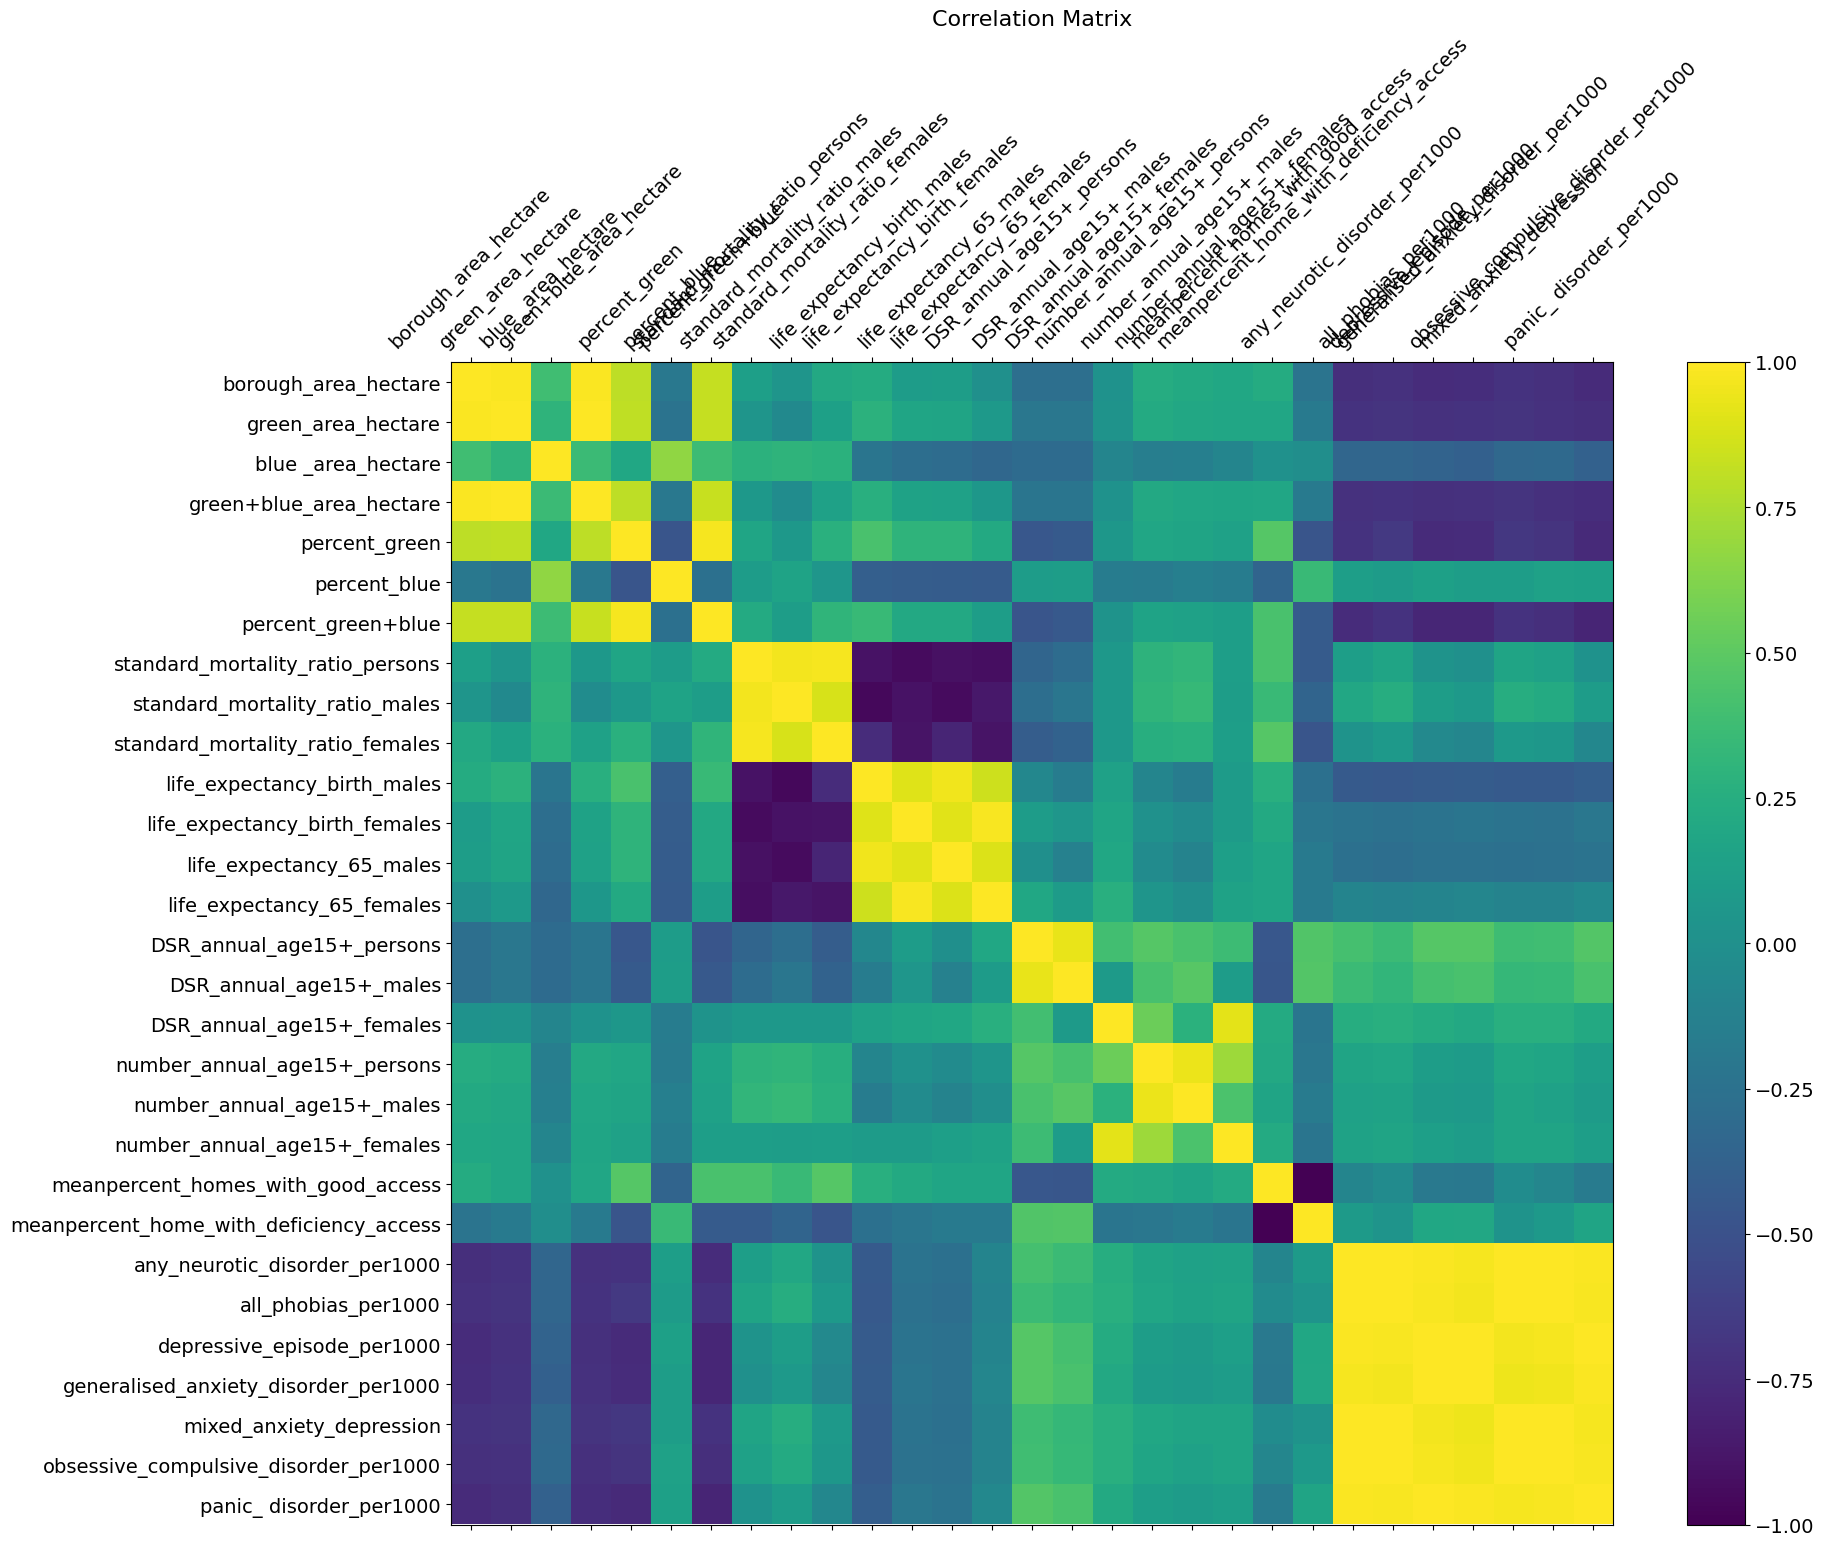

In [6]:
df.corr(numeric_only=True)
f = plt.figure(figsize=(19, 15)) # creates a new figure, sets length and width
plt.matshow(df.corr(numeric_only=True), fignum=f.number) # matshow - creates matrix plot for df_office.corr(), fignum - assigned number for when there is multiple figures plotted
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45) # add the x axis label
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14) # add the y axis label
# select_dtypes(['number']) - choose the numeric variables
cb = plt.colorbar() # add a legend to the right hand (default position)
cb.ax.tick_params(labelsize=14) # label size
plt.title('Correlation Matrix', fontsize=16) # add the title

### Male life expectancy

#### Regression analysis

In [38]:
reg_lifemale_green = smf.ols(formula='percent_green ~ life_expectancy_birth_males',data=df).fit()
reg_lifemale_green.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          percent_green   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     6.573
Date:                Sat, 02 Dec 2023   Prob (F-statistic):             0.0156
Time:                        15:32:30   Log-Likelihood:                -118.49
No. Observations:                  32   AIC:                             241.0
Df Residuals:                      30   BIC:                             243.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    -228.4361    106.589     -2.143      0.040    -446.120     -10.753
life_expectancy_birth_males     3.4082      1.329      2.564      0.016       0.693       6.123
==============================================================================
Omnibus:                        2.297   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                1.127
Skew:                          -0.346   Prob(JB):                        0.569
Kurtosis:                       3.605   Cond. No.                     4.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
beta_0, beta_1 = reg_lifemale_green.params
rsq    = reg_lifemale_green.rsquared
pval_0, pval_1 = reg_lifemale_green.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of greenery = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))

y = 3.408 x + -228.436
R^2 =  0.17973028331242558
p-value of greenery =  0.0156
p-value of intercept =  0.04033


In [15]:
reg_lifemale_green.params

Intercept                     -228.436099
life_expectancy_birth_males      3.408172
dtype: float64

<Axes: xlabel='percent_green', ylabel='life_expectancy_birth_males'>

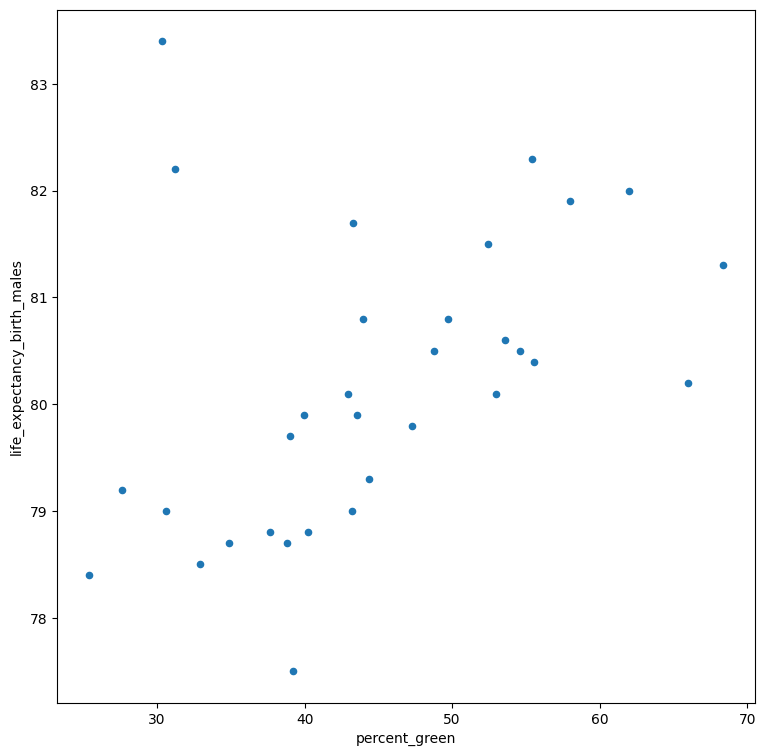

In [28]:
# plot the result
fig, ax = plt.subplots()
df.plot(kind='scatter', x='percent_green', y='life_expectancy_birth_males', figsize=(9, 9), ax = ax)

In [29]:
reg_lifemale_green.resid

1      3.502772
2      7.296815
3     -1.638475
4     -3.936841
5     19.711719
6     -6.731550
7      9.949073
8     -2.984196
9      8.391525
10     2.410514
11    -0.997034
12   -13.891120
13    -0.326841
14     3.363547
15    21.080708
16     8.678256
17     3.773976
18    -4.907034
19   -25.435443
20     3.090084
21    -6.195400
22     0.122148
23     2.858256
24   -10.169486
25     7.297439
26    10.955998
27    -2.457852
28     2.745804
29   -13.384583
30     2.528062
31    -4.185206
32   -20.515636
dtype: float64

In [42]:
reg_lifemale_green.fittedvalues

1     35.697228
2     50.693185
3     44.558475
4     43.876841
5     48.648281
6     50.011550
7     45.580927
8     46.944196
9     44.558475
10    40.809486
11    39.787034
12    41.491120
13    43.876841
14    52.056453
15    44.899292
16    45.921744
17    43.536024
18    39.787034
19    55.805443
20    49.329916
21    39.105400
22    40.127852
23    45.921744
24    40.809486
25    46.262561
26    51.034002
27    40.127852
28    46.944196
29    38.764583
30    41.831938
31    43.195206
32    51.715636
dtype: float64

**Residual models**

Scatter plot:

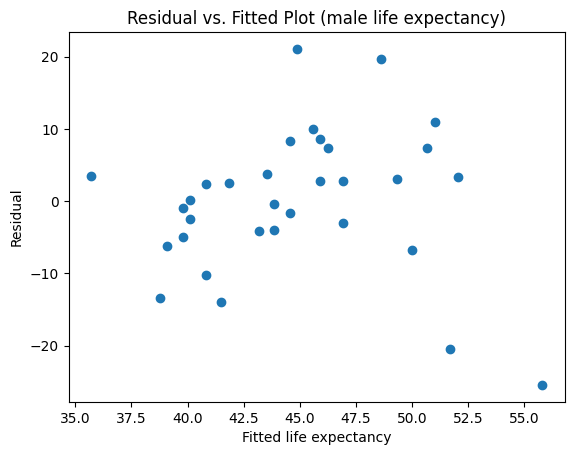

In [37]:
# plot 
plt.scatter(reg_lifemale_green.fittedvalues, reg_lifemale_green.resid)
# adding title and labels
plt.xlabel('Fitted life expectancy')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot (male life expectancy)')
plt.show()

Histogram:

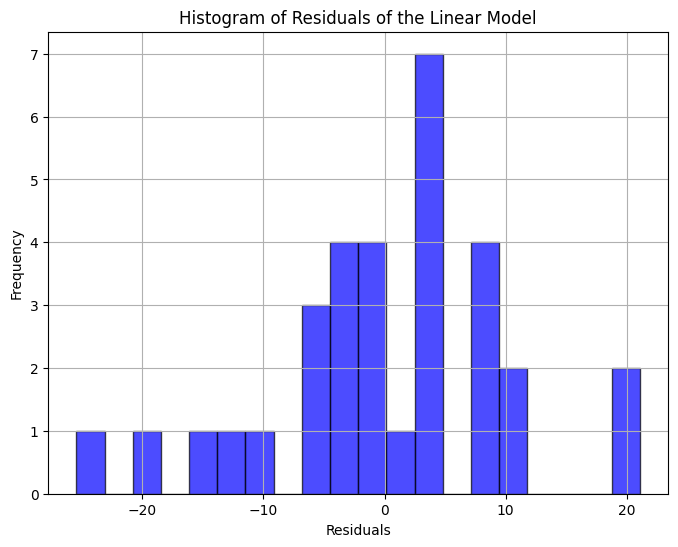

In [40]:
# Histogram of residuals

# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(reg_lifemale_green.resid, bins=20, color='blue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Linear Model')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

QQ Plot:

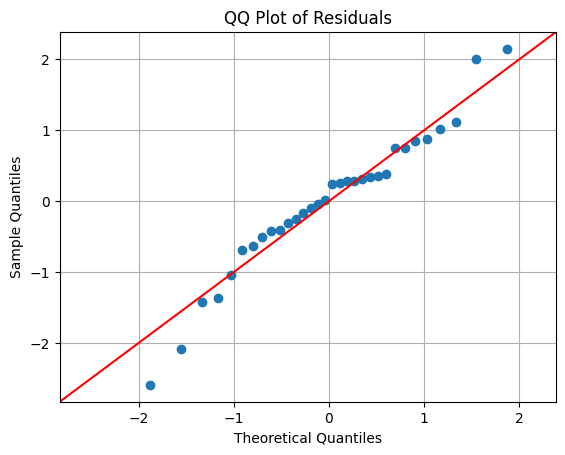

In [41]:
fig = sm.qqplot(reg_lifemale_green.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

### Female life expectancy

#### Regression analysis

In [43]:
reg_lifefemale_green = smf.ols(formula='percent_green ~ life_expectancy_birth_females',data=df).fit()
reg_lifefemale_green.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          percent_green   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.994
Date:                Sat, 02 Dec 2023   Prob (F-statistic):             0.0938
Time:                        15:38:56   Log-Likelihood:                -120.14
No. Observations:                  32   AIC:                             244.3
Df Residuals:                      30   BIC:                             247.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -197.4690    140.021     -1.410      0.169    -483.431      88.493
life_expectancy_birth_females     2.8827      1.666      1.730      0.094      -0.520       6.285
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.187
Skew:                          -0.041   Prob(JB):                        0.911
Kurtosis:                       2.635   Cond. No.                     6.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
beta_0, beta_1 = reg_lifefemale_green.params
rsq    = reg_lifefemale_green.rsquared
pval_0, pval_1 = reg_lifefemale_green.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of greenery = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))

y = 2.883 x + -197.469
R^2 =  0.09075271895397885
p-value of greenery =  0.09383
p-value of intercept =  0.16874


In [46]:
reg_lifefemale_green.params

Intercept                       -197.469036
life_expectancy_birth_females      2.882695
dtype: float64

<Axes: xlabel='percent_green', ylabel='life_expectancy_birth_males'>

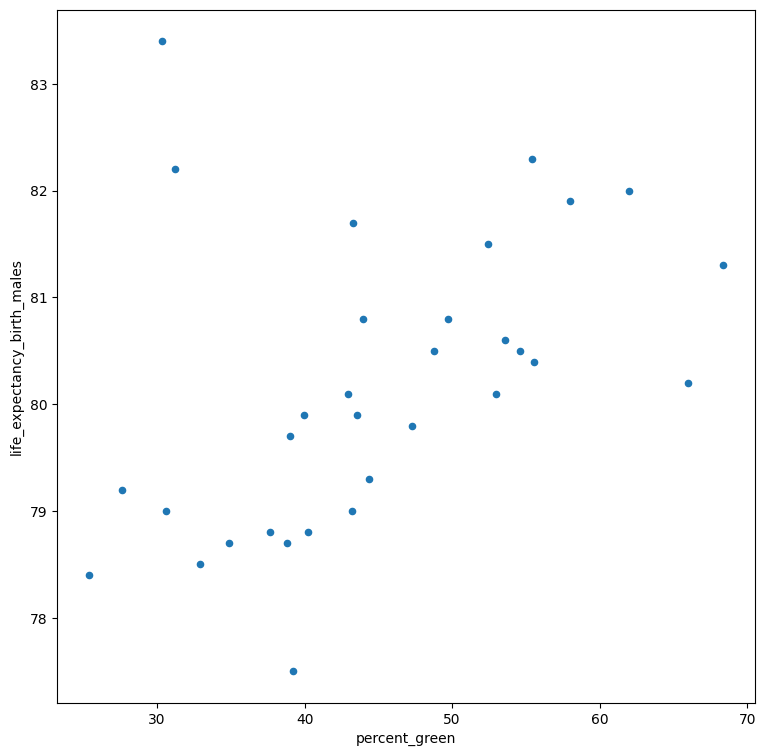

In [47]:
fig, ax = plt.subplots()
df.plot(kind='scatter', x='percent_green', y='life_expectancy_birth_males', figsize=(9, 9), ax = ax)

**Residual models**

Scatter plot:

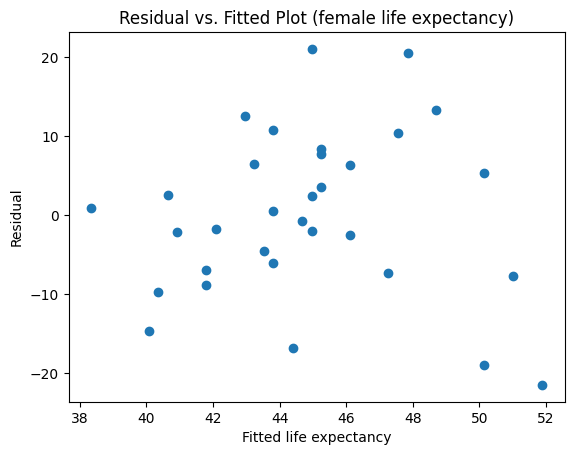

In [48]:
# plot 
plt.scatter(reg_lifefemale_green.fittedvalues, reg_lifefemale_green.resid)
# adding title and labels
plt.xlabel('Fitted life expectancy')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot (female life expectancy)')
plt.show()

Hisotgram:

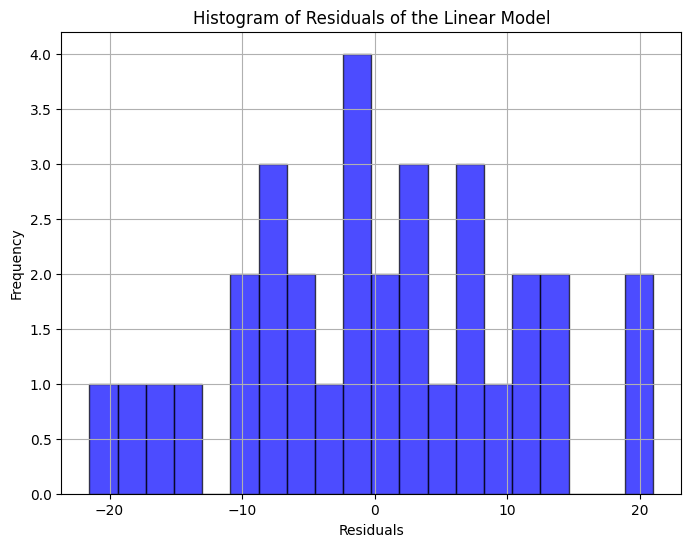

In [49]:
# Histogram of residuals

# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(reg_lifefemale_green.resid, bins=20, color='blue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Linear Model')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

QQ plot:

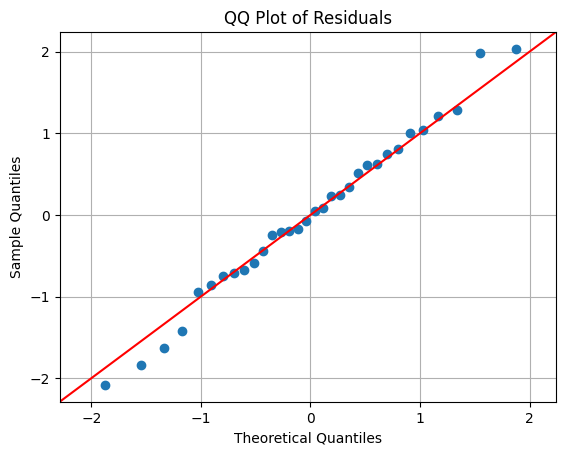

In [50]:
fig = sm.qqplot(reg_lifefemale_green.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

### Green Space and General Life Expectancy

#### EDA

<Axes: xlabel='life_expectancy_birth_females', ylabel='percent_green'>

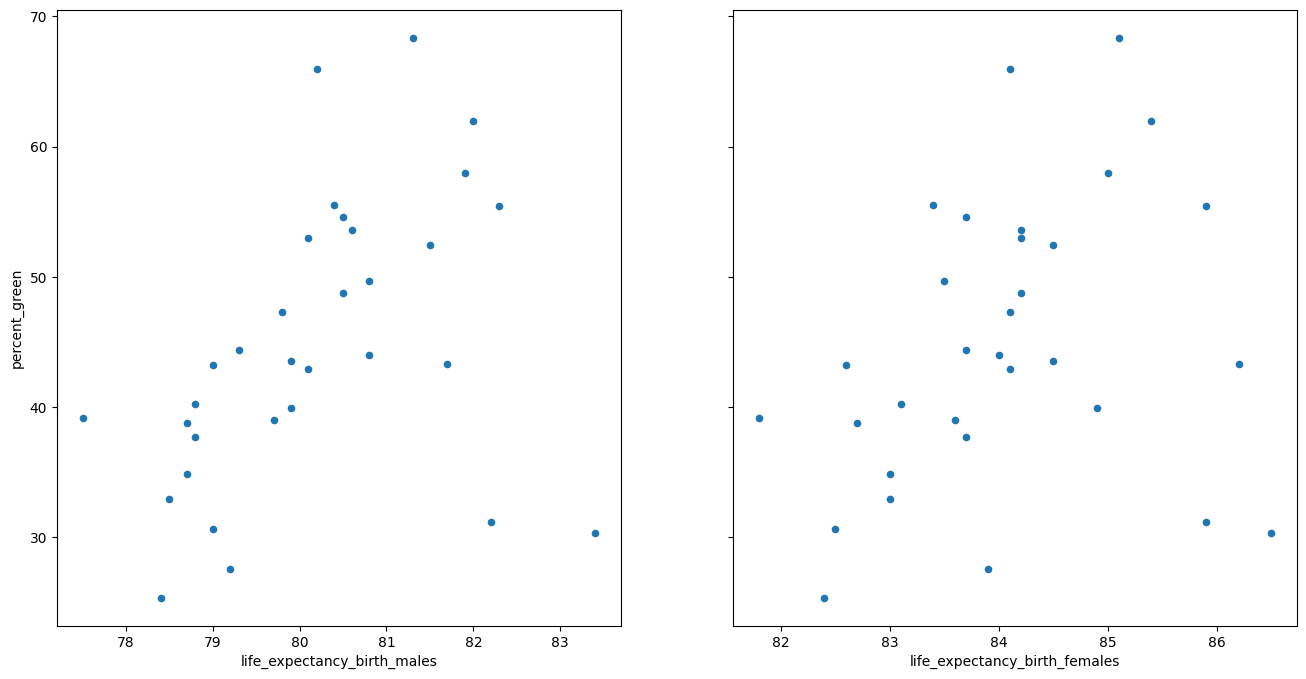

In [18]:
fig, axs = plt.subplots(1, 2, sharey=True)
df.plot(kind='scatter', x='life_expectancy_birth_males', y='percent_green', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='life_expectancy_birth_females', y='percent_green', ax=axs[1])
